# Neural Network
The goal is creating, training, and evaluating a basic neural network model that classifies images of handwritten digits from the MNIST dataset

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Retrieval

In [37]:
# Load the MNIST dataset (1):
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(1) Loading MNIST dataset from VSCode in MacOS requires an SSL installed in Python:
- Open the Finder.
- Go to the Applications folder.
- Look for a folder named Python x.x (matching your Python version).
- Inside this folder, you should find the Install Certificates.command file.
- Double-click on Install Certificates.command to run it.

### Exploratory Data Analysis

In [38]:
# `train_images` is a 3D-array containing 60,000 images,
# each of which is a 28x28 pixel grayscale image
train_images.shape

(60000, 28, 28)

In [39]:
# '28' represents the height or width of each image in pixels
train_images.imag[0].shape

(28, 28)

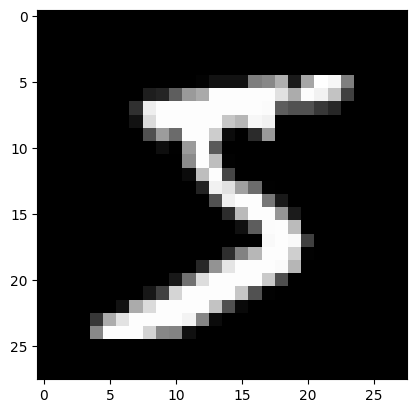

In [40]:
# Image with 0 is darker shade, 1 is lighest shade
plt.imshow(train_images[0], cmap="gray")
plt.show()

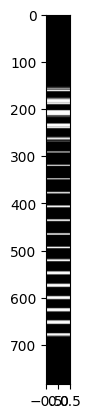

In [41]:
# The same represented in one vector would be:
# 28 x 28 = 784
plt.imshow(train_images[0].reshape(784, 1), cmap="gray", aspect=0.02)
plt.show()

### Prepare the Dataset

Libraries:
- `Dense` to create layers in the neural network
- `Sequential` to define the model
- `SGD` (Stochastic Gradient Descent) as the optimization algorithm

In [50]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

### Normalise the Images:
Image pixel values range from 0 to 255.

Dividing by 255 normalizes these values to a range between 0 and 1, which is a standard practice in image processing as it helps the neural network learn more efficiently.

In [42]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

### Flatten the images
Each image is a 28x28 grid of pixels.

We flatten this grid into a one-dimensional array of 784 pixels (28x28) so it can be fed into the neural network.

In [43]:
# Flatten the images for the dense layer
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

### Convert Labels to One-Hot Encoded Format
This converts the labels (which are digits from 0 to 9) into a format called one-hot encoding. 

For example, the digit 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].

In [44]:
# Convert labels to one-hot encoded format
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

### Build the Neural Network Model
We create a simple neural network model with one layer of 10 neurons (one for each digit).

The `softmax` activation function is used to turn the output into probabilities for each class (digit).

In [45]:
# Build the model
model = Sequential([Dense(10, activation="softmax", input_shape=(784,))])

### Compile the Model
This step prepares the model for training.

We specify the optimizer (SGD), the loss function (categorical cross-entropy, used for classification tasks), and the metric (accuracy) we want to track.

In [46]:
# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

### Train the Model
Here, the model is trained on the training data.
- `epochs=10` : the entire dataset is passed through the neural network 10 times
- `batch_size=100` : we use 100 images at a time to update the model.

In [47]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 523us/step - loss: 0.3922 - accuracy: 0.8890
Epoch 2/10
600/600 [==============================] - 0s 521us/step - loss: 0.3055 - accuracy: 0.9132
Epoch 3/10
600/600 [==============================] - 0s 508us/step - loss: 0.2922 - accuracy: 0.9177
Epoch 4/10
600/600 [==============================] - 0s 675us/step - loss: 0.2844 - accuracy: 0.9208
Epoch 5/10
600/600 [==============================] - 0s 550us/step - loss: 0.2790 - accuracy: 0.9220
Epoch 6/10
600/600 [==============================] - 0s 519us/step - loss: 0.2751 - accuracy: 0.9234
Epoch 7/10
600/600 [==============================] - 0s 496us/step - loss: 0.2729 - accuracy: 0.9236
Epoch 8/10
600/600 [==============================] - 0s 493us/step - loss: 0.2699 - accuracy: 0.9243
Epoch 9/10
600/600 [==============================] - 0s 494us/step - loss: 0.2678 - accuracy: 0.9253
Epoch 10/10
600/600 [==============================] - 0s 496us/step - loss: 0.266

### Evaluate the Model
We test the model's performance using the test data.

It outputs the accuracy of the model, telling us what percentage of the test images were correctly classified.

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Accuracy:", accuracy)

313/313 [==============================] - 0s 391us/step - loss: 0.2750 - accuracy: 0.9231
Accuracy: 0.9230999946594238
